In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

2024-02-20 11:01:10.617539: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-20 11:01:10.618961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 11:01:10.645354: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 11:01:10.645787: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-20 11:01:11.380816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [4]:
#Generators
train_data=keras.utils.image_dataset_from_directory(
        directory='archive/train',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256)
)
validation_data=keras.utils.image_dataset_from_directory(
        directory='archive/test',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [5]:
#Normalize
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label


train_data=train_data.map(process)
validataion_data=validation_data.map(process)

In [6]:
#Create CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))          
          
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
18/18 [==============================] - 12s 634ms/step - loss: 1.0358 - accuracy: 0.4740 - val_loss: 2.7992 - val_accuracy: 0.4929
Epoch 2/10
18/18 [==============================] - 12s 646ms/step - loss: 0.6954 - accuracy: 0.5063 - val_loss: 0.8704 - val_accuracy: 0.6000
Epoch 3/10
18/18 [==============================] - 12s 662ms/step - loss: 0.6843 - accuracy: 0.5619 - val_loss: 3.9609 - val_accuracy: 0.6071
Epoch 4/10
18/18 [==============================] - 12s 622ms/step - loss: 0.6580 - accuracy: 0.6481 - val_loss: 22.1635 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 12s 624ms/step - loss: 0.5868 - accuracy: 0.6715 - val_loss: 30.5001 - val_accuracy: 0.6000
Epoch 6/10
18/18 [==============================] - 12s 647ms/step - loss: 0.4505 - accuracy: 0.7953 - val_loss: 49.7151 - val_accuracy: 0.6286
Epoch 7/10
18/18 [==============================] - 12s 637ms/step - loss: 0.3098 - accuracy: 0.8707 - val_loss: 124.9577 - val_accuracy: 0

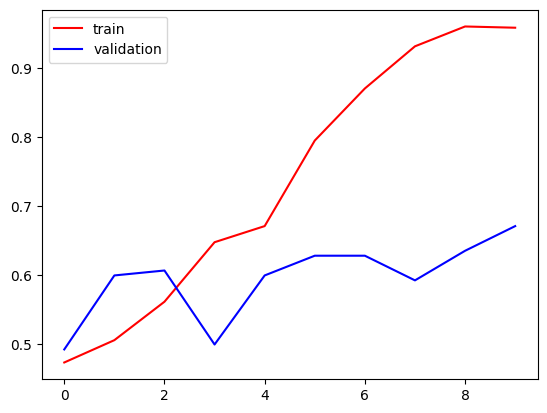

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

NameError: name 'model' is not defined

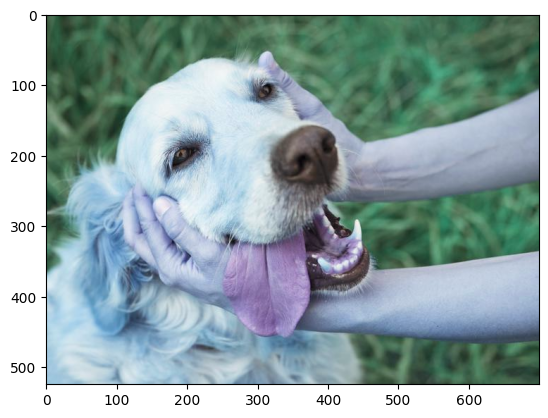

In [2]:
import cv2
import matplotlib.pyplot as plt
test_img=cv2.imread('test/dogs/dog_181.jpg')
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_img.shape
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

In [61]:
pip install opencv-python

     |████████████████████████████████| 62.2 MB 88 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.
